# The Vertex Collection

```{warning}
Not all examples on this page have been updated to r22 and ServiceX 3. Examples that have not been updated will be marked using a similar warning. These examples will be updated soon.
```

The `PrimaryVertex` collection contains a list of all the primary vertices in the event. The first one is the Tracking group's pick for the primary vertex.

In [1]:
from config import deliver_files, flat_array_from_files
from config import sx_f
from func_adl_servicex_xaodr22 import FuncADLQueryPHYSLITE

import matplotlib.pyplot as plt
import numpy as np
import uproot
import awkward as ak

Here we fetch all the primary vertices's in an event, their location and how many tracks are attached to them. Just as in the previous chapter, we need to specify the bank name:

In [6]:
query = FuncADLQueryPHYSLITE()
vertices_per_event = query.Select(lambda e: e.Vertices("PrimaryVertices"))
vertex_info_per_event = vertices_per_event.Select(
    lambda vert: {
        'x': vert.Select(lambda v: v.x()),
        'y': vert.Select(lambda v: v.y()),
        'z': vert.Select(lambda v: v.z()),
        'n': vert.Select(lambda v: v.nTrackParticles()),
    }
)

files = deliver_files(vertex_info_per_event,sx_f)

Output()

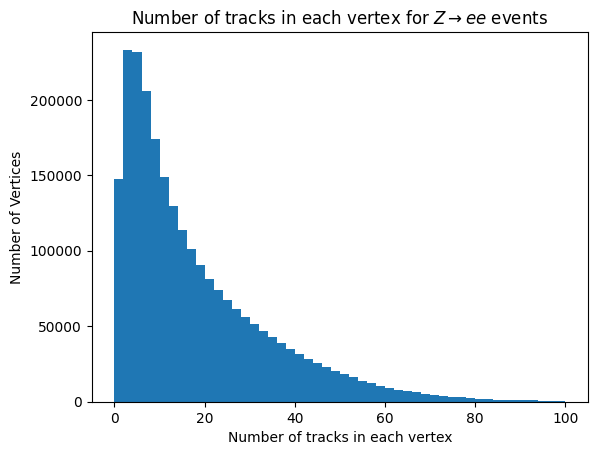

In [7]:
plt.hist(flat_array_from_files(files,'n'), bins=50, range=(0, 100))
plt.xlabel('Number of tracks in each vertex')
plt.ylabel('Number of Vertices')
_ = plt.title('Number of tracks in each vertex for $Z\\rightarrow ee$ events')

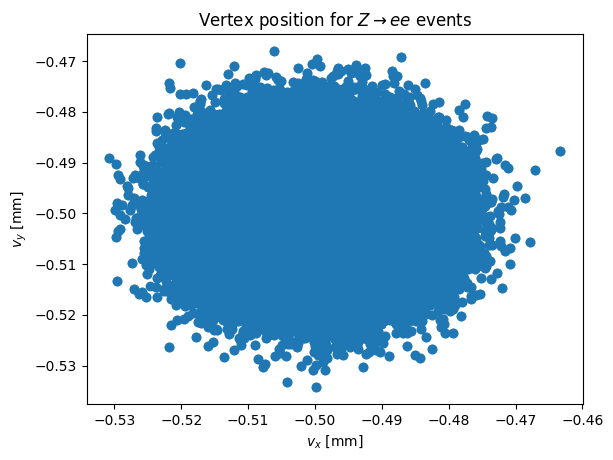

In [8]:
plt.scatter(flat_array_from_files(files,'x'), flat_array_from_files(files,'y'))
plt.xlabel('$v_x$ [mm]')
plt.ylabel("$v_y$ [mm]")
_ = plt.title('Vertex position for $Z\\rightarrow ee$ events')

At the Tevatron you could see the beam tilt. No so much here at the LHC!

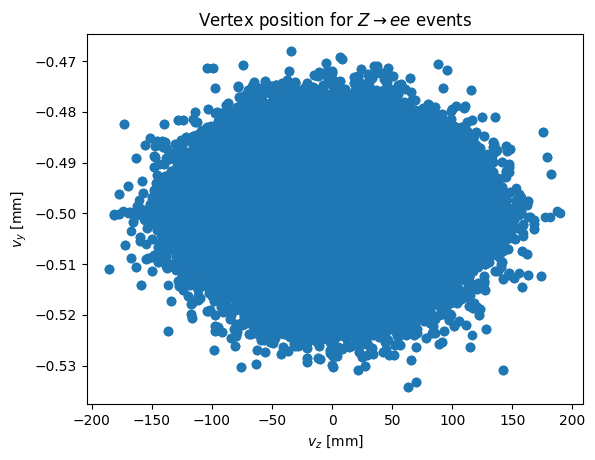

In [9]:
plt.scatter(flat_array_from_files(files,'z'), flat_array_from_files(files,'y'))
plt.xlabel('$v_z$ [mm]')
plt.ylabel("$v_y$ [mm]")
_ = plt.title('Vertex position for $Z\\rightarrow ee$ events')

Normally one wants only the primary vertex - which in ATLAS is the first vertex in the collection.

```{warning}
This example has not been updated to r22 and ServiceX 3 yet.
```

In [13]:
pvs = (ds
       .Select(lambda e: e.Vertices("PrimaryVertices").First())
       .Select(lambda v:
       {
               "x": v.x(),
               "y": v.y(),
               "z": v.z(),
               "n": v.nTrackParticles(),
       })
       .AsAwkwardArray()
       .value())

Method Select not found on object <class 'func_adl_servicex_xaodr22.xAOD.vertex_v1.Vertex_v1'>
Method Select not found on object <class 'func_adl_servicex_xaodr22.xAOD.vertex_v1.Vertex_v1'>
Method Select not found on object <class 'func_adl_servicex_xaodr22.xAOD.vertex_v1.Vertex_v1'>
Method Select not found on object <class 'func_adl_servicex_xaodr22.xAOD.vertex_v1.Vertex_v1'>


Output()

In [15]:
plt.hist(pvs.n, bins=50, range=(0, 100))
plt.xlabel('Number of tracks in each primary vertex')
plt.ylabel('Number of Vertices')
_ = plt.title('Number of tracks in each PV for $Z\\rightarrow ee$ events')

ReturnValueException: Exception occurred while making ServiceX request.
Traceback (most recent call last):
  File "/home/rjanusia/.local/lib/python3.9/site-packages/servicex/query_core.py", line 548, in as_files_async
    return await self.submit_and_download(
  File "/home/rjanusia/.local/lib/python3.9/site-packages/servicex/query_core.py", line 283, in submit_and_download
    self.request_id = await self.servicex.submit_transform(sx_request)
  File "/home/rjanusia/.local/lib/python3.9/site-packages/servicex/servicex_adapter.py", line 127, in submit_transform
    raise RuntimeError("ServiceX WebAPI Error during transformation "
RuntimeError: ServiceX WebAPI Error during transformation submission: 500 - Something went wrong (Failed to generate translation code: Unable to generate a sequence from the given AST. Either there is an internal error, or you are trying to manipulate a xAOD::Vertex_v1* value (expression i_obj114) ('cpp_value') as a sequence (ast is: Call(func=Name(id='First', ctx=Load()), args=[Call(func=CPPCodeValue(), args=[Constant(value='PrimaryVertices')], keywords=[])], keywords=[])))


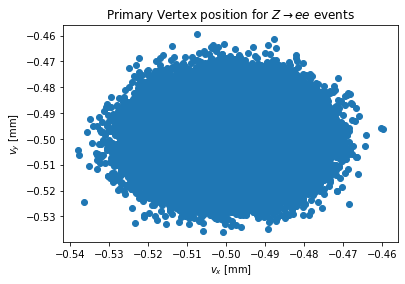

In [8]:
plt.scatter(pvs.x, pvs.y)
plt.xlabel('$v_x$ [mm]')
plt.ylabel("$v_y$ [mm]")
_ = plt.title('Primary Vertex position for $Z\\rightarrow ee$ events')

Note that the wings are gone now in the tilt plot, and the hight is more compressed. The wings were likely beam-gas interactions or similar.

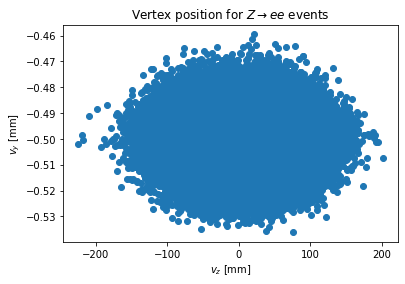

In [9]:
plt.scatter(pvs.z, pvs.y)
plt.xlabel('$v_z$ [mm]')
plt.ylabel("$v_y$ [mm]")
_ = plt.title('Vertex position for $Z\\rightarrow ee$ events')

## The Datamodel

The data model when this documentation was last built was:

In [14]:
from func_adl_servicex_xaodr22.xAOD.trackparticle_v1 import TrackParticle_v1
help(TrackParticle_v1)

Help on class TrackParticle_v1 in module func_adl_servicex_xaodr22.xAOD.trackparticle_v1:

class TrackParticle_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  beamlineTiltX(self) -> 'float'
 |      A method
 |  
 |  beamlineTiltY(self) -> 'float'
 |      A method
 |  
 |  charge(self) -> 'float'
 |      A method
 |  
 |  chiSquared(self) -> 'float'
 |      A method
 |  
 |  clearDecorations(self) -> 'bool'
 |      A method
 |  
 |  d0(self) -> 'float'
 |      A method
 |  
 |  definingParametersCovMatrixDiagVec(self) -> 'func_adl_servicex_xaodr22.vector_float_.vector_float_'
 |      A method
 |  
 |  definingParametersCovMatrixOffDiagCompr(self) -> 'bool'
 |      A method
 |  
 |  definingParametersCovMatrixOffDiagVec(self) -> 'func_adl_servicex_xaodr22.vector_float_.vector_float_'
 |      A method
 |  
 |  definingParametersCovMatrixVec(self) -> 'func_adl_servicex_xaodr22.vector_float_.vector_float_'
 |      A method
 |  
 |  e(self) -> 'float'
 |      A method

## Further Information

* The [`xAOD::TrackParticle_v1` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODTracking/xAODTracking/versions/TrackParticle_v1.h) with all the inline documentation.
* The [Tracking CP group R21 recommendation pages](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/TrackingCPRecsEarly2018#Track_Selection) on the ATLAS TWiki